In [31]:
import pandas as pd

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [32]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from patsy import dmatrices



df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3443888,-5.0,132298.0,-7.0,-64.0,100.000000,1,31,1,1,...,1,1,50,0,0,1,0,0,289,0
1,3295757,-45.0,185988.0,13.0,-12.0,100.000000,1,13,0,0,...,0,0,42,0,0,1,0,1,141,0
2,3007329,-5.0,6958.0,0.0,0.0,95.699997,1,22,1,1,...,0,0,67,1,0,1,1,0,641,0
3,3265424,-5.0,68704.0,0.0,0.0,100.000000,1,22,0,0,...,0,0,41,1,0,1,0,0,641,0
4,3026692,-5.0,152184.0,0.0,0.0,94.050003,1,22,1,1,...,0,0,35,1,0,1,1,0,641,0


In [33]:
X = df.drop(['isFraud', 'TransactionID'], axis=1)
y = df['isFraud']

#X, y = dmatrices( )

model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
y_pred = model.predict(X)

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
print(confusion_matrix(y,y_pred))
print('Accuracy', metrics.accuracy_score(y,y_pred))

[[6356 1285]
 [1450 6191]]
Accuracy 0.8210312786284518


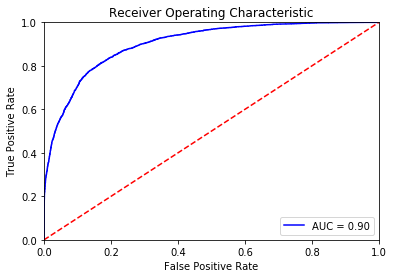

In [22]:

# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = model.predict_proba(X)[::,1]

fpr, tpr, threshold = metrics.roc_curve(y, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [43]:
df_test = pd.read_csv('identity_test.csv').drop('Unnamed: 0', axis=1)



X_test = df_test.drop(['isFraud', 'TransactionID'], axis=1)
set.seed(0)
X_test_samp = X_test.sample(n = 7641)

X_test_samp
#y_test = df_test['isFraud'][]

#y_test_pred = model.predict(X_test_samp)

#confusion_matrix(y_test,y_test_pred)
#print('Accuracy', metrics.accuracy_score(y_test,y_test_pred))

AttributeError: type object 'set' has no attribute 'seed'